# Plot a SM phase diagram

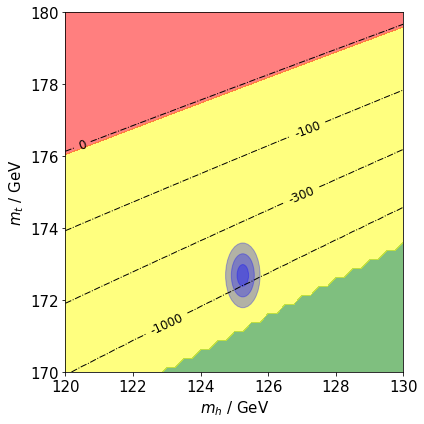

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pat

# data info
DATE_LABEL = "202306"
MT_MIN = 170
MT_MAX = 180
MH_MIN = 120
MH_MAX = 130
nPts = 40

# physical parameters
MTPOLE = 172.69
MTPOLE_ERR = 0.3
MH = 125.25
MH_ERR = 0.17

# figure settings
fig = plt.figure(figsize=[6,6])

# subfigure
ax = fig.add_subplot(1,1,1)

# data input
data = np.loadtxt("../output/" + DATE_LABEL + ".dat", usecols=range(3), delimiter='\t', 
)
mt = data[:,0]
mh = data[:,1]
log10gamma = data[:,2]

# reshape 1D to 2D
X, Y, Z = mh.reshape(nPts+1,nPts+1), mt.reshape(nPts+1,nPts+1), log10gamma.reshape(nPts+1,nPts+1)

# contour plot (line / area)
fake_norm = 1e10 # used for absolute stability
cs = ax.contour(X, Y, Z, levels=[-1000, -300, -100, 0], colors='black', linewidths=1, linestyles='-.')
ax.contourf(X, Y, Z, levels=[-fake_norm,-0.5*fake_norm], alpha=0.5, colors='green')
ax.contourf(X, Y, Z, levels=[-0.5*fake_norm, -3], alpha=0.5, colors='yellow')
ax.contourf(X, Y, Z, levels=[-3, fake_norm], alpha=0.5, colors='red')

# contour small label
ax.clabel(cs, fmt='%d', fontsize=12)

# physical parameters
for sigma in range(1, 4):
  e = pat.Ellipse(xy=(MH, MTPOLE), width=2*sigma*MH_ERR, height=2*sigma*MTPOLE_ERR, alpha=0.3, color="blue")
  ax.add_patch(e)

# plot range
ax.set_xlim(120, 130)
ax.set_ylim(170, 180)

# ticks setting
# ax.set_xticks([0, 0.5, 1])
# ax.set_yticks([0, 0.5, 1])
ax.tick_params(labelsize=15)

# figure captions
ax.set_xlabel(r"$m_h$ / GeV", size=15)
ax.set_ylabel(r"$m_t$ / GeV", size=15)

plt.tight_layout()
plt.savefig('phase_diagram.pdf', bbox_inches='tight')
